<a href="https://colab.research.google.com/github/chaymabaya/reconnaissace-faciale/blob/main/comparaison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()

Saving emotion_detection_mobilenet.zip to emotion_detection_mobilenet.zip


In [4]:
import zipfile
import os

zip_path = "emotion_detection_mobilenet.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [5]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

dataset_path = "/content/dataset/train"
classes = sorted(os.listdir(dataset_path))

X, y = [], []
for label_index, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)

    # Vérifie que c’est bien un dossier
    if not os.path.isdir(class_path):
        continue

    for image_name in os.listdir(class_path):
        img_path = os.path.join(class_path, image_name)

        # Vérifie que c’est un fichier (et non un dossier)
        if not os.path.isfile(img_path):
            continue

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:
            try:
                img = cv2.resize(img, (48, 48))
                X.append(img)
                y.append(label_index)
            except:
                print(f"Erreur de redimensionnement : {img_path}")
        else:
            print(f"Image non chargée : {img_path}")

# Conversion finale
X = np.array(X).reshape(-1, 48, 48, 1) / 255.0
y = to_categorical(y, num_classes=len(classes))

print(f"Nombre total d’images chargées : {len(X)}")


Nombre total d’images chargées : 28709


In [6]:
def load_dataset(path):
    classes = sorted(os.listdir(path))
    X, y = [], []
    for label_index, class_name in enumerate(classes):
        class_path = os.path.join(path, class_name)
        if not os.path.isdir(class_path):
            continue
        for image_name in os.listdir(class_path):
            img_path = os.path.join(class_path, image_name)
            if not os.path.isfile(img_path):
                continue
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (48, 48))
                X.append(img)
                y.append(label_index)
    X = np.array(X).reshape(-1, 48, 48, 1) / 255.0
    y = to_categorical(y, num_classes=len(classes))
    return X, y, classes

X_train, y_train, classes = load_dataset('/content/dataset/train')
X_test, y_test, _ = load_dataset('/content/dataset/test')

print(f"Train: {len(X_train)} images, Test: {len(X_test)} images")


Train: 28709 images, Test: 7178 images


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, SeparableConv2D, Dropout
from tensorflow.keras.utils import to_categorical

def mini_xception(input_shape=(48,48,1), num_classes=7):
    inputs = Input(shape=input_shape)

    x = Conv2D(8, (3,3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = SeparableConv2D(16, (3,3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.25)(x)

    x = SeparableConv2D(32, (3,3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.25)(x)

    x = SeparableConv2D(64, (3,3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D()(x)
    x = Dropout(0.25)(x)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

model = mini_xception()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

model.save('mini_xception_model.h5')


Epoch 1/200
449/449 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.2338 - loss: 1.8282 - val_accuracy: 0.1878 - val_loss: 1.8252
Epoch 2/200
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2777 - loss: 1.7565 - val_accuracy: 0.3136 - val_loss: 1.7159
Epoch 3/200
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3067 - loss: 1.7211 - val_accuracy: 0.2838 - val_loss: 1.8345
Epoch 4/200
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3291 - loss: 1.6906 - val_accuracy: 0.2873 - val_loss: 1.7558
Epoch 5/200
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3409 - loss: 1.6688 - val_accuracy: 0.1991 - val_loss: 1.9339
Epoch 6/200
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3503 - loss: 1.6515 - val_accuracy: 0.3617 - val_loss: 1.6120
Epoch 7/200
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3538 - loss: 1.6353 - val_accuracy: 0.3803 - val_loss: 1.5856
Epoch 8/200
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3696 - loss: 1.6099 - val_a

In [15]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

dataset_dir = "/content/dataset"
categories = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
num_classes = len(categories)

X = []
y = []

for label_index, category in enumerate(categories):
    for folder in ['train', 'test']:
        folder_path = os.path.join(dataset_dir, folder, category)
        if not os.path.exists(folder_path):
            continue

        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            img = cv2.imread(image_path)
            if img is None:
                continue
            img = cv2.resize(img, (48, 48))  # Pour Mini-Xception
            img = img / 255.0
            img = np.expand_dims(img, axis=-1)  # Ajouter canal si image grayscale
            X.append(img)
            y.append(label_index)

X = np.array(X, dtype="float32")
y = to_categorical(y, num_classes=num_classes)

# Séparer les données en entraînement et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [21]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (48, 48))
img = img / 255.0
img = np.expand_dims(img, axis=-1)  # (48, 48, 1)


In [30]:
from tensorflow.keras.models import load_model

model_x = load_model('/content/mini_xception.h5')

loss_x, acc_x = model_x.evaluate(X_test, y_test, verbose=1)
print(f"Mini-Xception Accuracy: {acc_x * 100:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5115 - loss: 1.2936
Mini-Xception Accuracy: 50.78%


MobelNet


In [28]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

dataset_dir = "/content/dataset"
categories = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
num_classes = len(categories)

X = []
y = []

for label_index, category in enumerate(categories):
    for folder in ['train', 'test']:
        folder_path = os.path.join(dataset_dir, folder, category)
        if not os.path.exists(folder_path):
            continue

        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # <-- Lecture en niveaux de gris
            if img is None:
                continue
            img = cv2.resize(img, (48, 48))
            img = img / 255.0
            img = np.expand_dims(img, axis=-1)  # <-- Pour obtenir (48, 48, 1)
            X.append(img)
            y.append(label_index)

X = np.array(X, dtype="float32")
y = to_categorical(y, num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
import tensorflow as tf

# Préparation des données pour MobileNet
X_train_m = tf.image.resize(tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_train)), (96,96))
X_test_m = tf.image.resize(tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_test)), (96,96))

input_tensor = Input(shape=(96,96,3))
base_model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

x = base_model.output
x = GlobalAveragePooling2D()(x)
outputs = Dense(num_classes, activation='softmax')(x)

model_mobilenet = Model(inputs=base_model.input, outputs=outputs)

model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_mobilenet.fit(X_train_m, y_train, epochs=102, batch_size=64, validation_data=(X_test_m, y_test))

model_mobilenet.save('mobilenet_emotion_model.h5')


<ipython-input-29-6a6d2d6c24ab>:11: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/102


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_383']
Received: inputs=Tensor(shape=(None, 96, 96, 3))
  warnings.warn(msg)


449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 115ms/step - accuracy: 0.4603 - loss: 1.4527 - val_accuracy: 0.5018 - val_loss: 2.4912
Epoch 2/102
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.6124 - loss: 1.0310 - val_accuracy: 0.5398 - val_loss: 2.4151
Epoch 3/102
449/449 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.6601 - loss: 0.9053 - val_accuracy: 0.5124 - val_loss: 2.3063
Epoch 4/102
449/449 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.6890 - loss: 0.8386 - val_accuracy: 0.4217 - val_loss: 2.9153
Epoch 5/102
449/449 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.7174 - loss: 0.7637 - val_accuracy: 0.3072 - val_loss: 4.2553
Epoch 6/102
449/449 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.7467 - loss: 0.6975 - val_accuracy: 0.4631 - val_loss: 2.3292
Epoch 7/102
449/449 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.7650 - loss: 0.6433 - val_accuracy: 0.5585 - val_loss: 2.1455
Epoch 8/102
449/449 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.7905 - loss: 0.5785 - val

In [31]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

dataset_dir = "/content/dataset"
categories = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
num_classes = len(categories)

X = []
y = []

for label_index, category in enumerate(categories):
    for folder in ['train', 'test']:
        folder_path = os.path.join(dataset_dir, folder, category)
        if not os.path.exists(folder_path):
            continue

        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            img = cv2.imread(image_path)
            if img is None:
                continue
            img = cv2.resize(img, (48, 48))  # Pour Mini-Xception
            img = img / 255.0
            img = np.expand_dims(img, axis=-1)  # Ajouter canal si image grayscale
            X.append(img)
            y.append(label_index)

X = np.array(X, dtype="float32")
y = to_categorical(y, num_classes=num_classes)

# Séparer les données en entraînement et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [32]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (48, 48))
img = img / 255.0
img = np.expand_dims(img, axis=-1)  # (48, 48, 1)


In [35]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Re-load the data specifically for MobileNet evaluation
# This code block is copied from ipython-input-28-fd54d4dfe90b
dataset_dir = "/content/dataset"
categories = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
num_classes = len(categories)

X = []
y = []

for label_index, category in enumerate(categories):
    for folder in ['train', 'test']:
        folder_path = os.path.join(dataset_dir, folder, category)
        if not os.path.exists(folder_path):
            continue

        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            # Read as grayscale
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, (48, 48))
            img = img / 255.0
            # Ensure shape is (48, 48, 1)
            img = np.expand_dims(img, axis=-1)
            X.append(img)
            y.append(label_index)

X = np.array(X, dtype="float32")
y = to_categorical(y, num_classes=num_classes)

# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


model_x = load_model('/content/mobilenet_emotion_model.h5')

# Préparation des données pour l'évaluation de MobileNet
# Assurez-vous que les données ont le même format que celles utilisées pour l'entraînement
# Redimensionner les images à (96, 96) et convertir en RGB
X_test_m = tf.image.resize(tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_test)), (96,96))

loss_x, acc_x = model_x.evaluate(X_test_m, y_test, verbose=1)
print(f"mobilenet Accuracy: {acc_x * 100:.2f}%")

225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.6024 - loss: 2.8100
mobilenet Accuracy: 59.82%


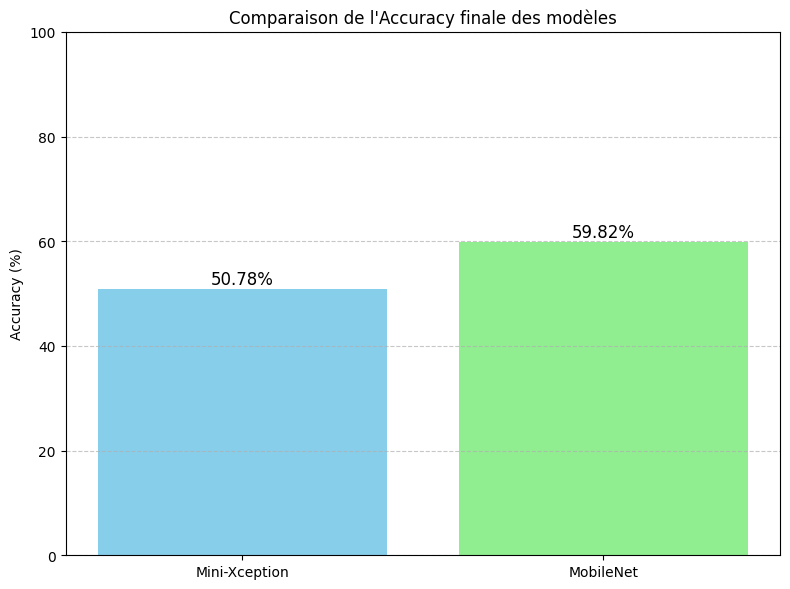

In [37]:
import matplotlib.pyplot as plt

# Noms des modèles
models = ['Mini-Xception', 'MobileNet']

# Leurs accuracies en pourcentage
accuracies = [50.78, 59.82]

# Création du diagramme en barres
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])

# Ajouter les pourcentages au-dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.2f}%', ha='center', fontsize=12)

# Mise en forme
plt.title("Comparaison de l'Accuracy finale des modèles")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

